In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\kuliah\\sem3\\data mining\\data.jabarprov.go.id\\data-masyarakat-miskin-tahun-2020.csv")
df.head()

,Kode Kecamatan,Kecamatan,Kode Kelurahan,Kelurahan,RW,Jumlah Kepala Keluarga,Jumlah Anggota Keluarga
0,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,1,98,255
1,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,2,7,21
2,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,3,26,56
3,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,4,6,17
4,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,5,161,379


In [3]:
df1 = pd.read_csv("D:\\kuliah\\sem3\\data mining\\data.jabarprov.go.id\\data-usaha-kecil-dan-menengah-tahun-2020.csv")
df1.head()

,Kode Kecamatan,Kecamatan,Kode Kelurahan,Kelurahan,Nama Perusahaan,Jenis Usaha,Alamat Usaha,Jumlah Pekerja
0,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,Abdullah Syuaib,Craft,Jl. Kalijati No. 42 RT 07/04 Antapani Kulon,20.0
1,32.73.20,Antapani,32.73.20.1006,Antapani Wetan,Achmad Sutisna,Kuliner,Jl. Malangbong V No. 38 Antapani Bandung,0.0
2,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,Ade,Kuliner,Jl. Tarumasari RT 04/05 Antapani Kulon,3.0
3,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,Agus,Kuliner,Jl. Sukapura No. 2 RT 01/06 Antapani Kulon,1.0
4,32.73.20,Antapani,32.73.20.1006,Antapani Wetan,Agus Koswara,Jasa,Jl. Sindangsari III RT 01/09 Antapani Wetan,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Kode Kecamatan           46 non-null     object
 1   Kecamatan                46 non-null     object
 2   Kode Kelurahan           46 non-null     object
 3   Kelurahan                46 non-null     object
 4   RW                       46 non-null     object
 5   Jumlah Kepala Keluarga   46 non-null     int64 
 6   Jumlah Anggota Keluarga  46 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.6+ KB


In [5]:
df.Kelurahan = pd.Categorical(df.Kelurahan,ordered=True,categories=['Antapani Kulon','Antapani Tengah','Antapani wetan','Antapani Kidul'])

In [6]:
df.head()

,Kode Kecamatan,Kecamatan,Kode Kelurahan,Kelurahan,RW,Jumlah Kepala Keluarga,Jumlah Anggota Keluarga
0,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,1,98,255
1,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,2,7,21
2,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,3,26,56
3,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,4,6,17
4,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,5,161,379


In [7]:
df.isna().sum()

Kode Kecamatan             0
Kecamatan                  0
Kode Kelurahan             0
Kelurahan                  0
RW                         0
Jumlah Kepala Keluarga     0
Jumlah Anggota Keluarga    0
dtype: int64

In [8]:
df.columns = df.columns.str.replace(' ','_', regex=True)

In [9]:
df.isna().sum()

Kode_Kecamatan             0
Kecamatan                  0
Kode_Kelurahan             0
Kelurahan                  0
RW                         0
Jumlah_Kepala_Keluarga     0
Jumlah_Anggota_Keluarga    0
dtype: int64

In [10]:
df2 =df.groupby(['Kelurahan']).sum()
df2.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_3676\1807678363.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 =df.groupby(['Kelurahan']).sum()


,Kode_Kecamatan,Kecamatan,Kode_Kelurahan,RW,Jumlah_Kepala_Keluarga,Jumlah_Anggota_Keluarga
Kelurahan,,,,,,
Antapani Kulon,32.73.2032.73.2032.73.2032.73.2032.73.2032.73....,AntapaniAntapaniAntapaniAntapaniAntapaniAntapa...,32.73.20.100132.73.20.100132.73.20.100132.73.2...,1234567,481,1238
Antapani Tengah,32.73.2032.73.2032.73.2032.73.2032.73.2032.73....,AntapaniAntapaniAntapaniAntapaniAntapaniAntapa...,32.73.20.100432.73.20.100432.73.20.100432.73.2...,12345678910131415161718192021222324,866,1913
Antapani wetan,32.73.20,Antapani,32.73.20.1004,9-Jan,2547,27
Antapani Kidul,32.73.2032.73.2032.73.2032.73.2032.73.2032.73....,AntapaniAntapaniAntapaniAntapaniAntapaniAntapa...,32.73.20.100532.73.20.100532.73.20.100532.73.2...,123456891113141516171819,388,942


In [11]:
df2 = df2.drop(["Kode_Kecamatan","Kecamatan","Kode_Kelurahan", "RW"], axis=1)
df2.head()

,Jumlah_Kepala_Keluarga,Jumlah_Anggota_Keluarga
Kelurahan,,
Antapani Kulon,481,1238
Antapani Tengah,866,1913
Antapani wetan,2547,27
Antapani Kidul,388,942


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kode Kecamatan   143 non-null    object 
 1   Kecamatan        143 non-null    object 
 2   Kode Kelurahan   143 non-null    object 
 3   Kelurahan        143 non-null    object 
 4   Nama Perusahaan  143 non-null    object 
 5   Jenis Usaha      143 non-null    object 
 6   Alamat Usaha     143 non-null    object 
 7   Jumlah Pekerja   142 non-null    float64
dtypes: float64(1), object(7)
memory usage: 9.1+ KB


In [13]:
df1.columns = df1.columns.str.replace(' ','_', regex=True)

In [14]:
df1.isna().sum()

Kode_Kecamatan     0
Kecamatan          0
Kode_Kelurahan     0
Kelurahan          0
Nama_Perusahaan    0
Jenis_Usaha        0
Alamat_Usaha       0
Jumlah_Pekerja     1
dtype: int64

In [15]:
df1["Jumlah_Pekerja"].fillna("0", inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3676\3948019381.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1["Jumlah_Pekerja"].fillna("0", inplace = True)


In [16]:
df1["Jumlah_Pekerja"] = df1["Jumlah_Pekerja"].astype("int64")

In [17]:
df1.isna().sum()

Kode_Kecamatan     0
Kecamatan          0
Kode_Kelurahan     0
Kelurahan          0
Nama_Perusahaan    0
Jenis_Usaha        0
Alamat_Usaha       0
Jumlah_Pekerja     0
dtype: int64

In [18]:
df1.Jenis_Usaha = pd.Categorical(df1.Jenis_Usaha,ordered=True,categories=['Fashion','Craft','Jasa','lainnya'])

In [19]:
df1.head()

,Kode_Kecamatan,Kecamatan,Kode_Kelurahan,Kelurahan,Nama_Perusahaan,Jenis_Usaha,Alamat_Usaha,Jumlah_Pekerja
0,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,Abdullah Syuaib,Craft,Jl. Kalijati No. 42 RT 07/04 Antapani Kulon,20
1,32.73.20,Antapani,32.73.20.1006,Antapani Wetan,Achmad Sutisna,NaN,Jl. Malangbong V No. 38 Antapani Bandung,0
2,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,Ade,NaN,Jl. Tarumasari RT 04/05 Antapani Kulon,3
3,32.73.20,Antapani,32.73.20.1001,Antapani Kulon,Agus,NaN,Jl. Sukapura No. 2 RT 01/06 Antapani Kulon,1
4,32.73.20,Antapani,32.73.20.1006,Antapani Wetan,Agus Koswara,Jasa,Jl. Sindangsari III RT 01/09 Antapani Wetan,2


In [20]:
df1.isna().sum()

Kode_Kecamatan      0
Kecamatan           0
Kode_Kelurahan      0
Kelurahan           0
Nama_Perusahaan     0
Jenis_Usaha        99
Alamat_Usaha        0
Jumlah_Pekerja      0
dtype: int64

In [21]:
df1["Jenis_Usaha"].fillna("lainnya", inplace = True)

In [22]:
df3 =df1.groupby(['Jenis_Usaha']).count()
df3 = df3.drop(["Kode_Kecamatan", "Kecamatan", "Kode_Kelurahan", "Kelurahan", "Alamat_Usaha", "Nama_Perusahaan"], axis=1)
df3.columns = df3.columns.str.replace('Jumlah_Pekerja','Total', regex=True)
df3.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_3676\2382222555.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 =df1.groupby(['Jenis_Usaha']).count()


,Total
Jenis_Usaha,
Fashion,22
Craft,20
Jasa,2
lainnya,99


C:\Users\HP\AppData\Local\Temp\ipykernel_3676\4130338443.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_groups1 = df3.groupby(['Jenis_Usaha'])[['Total',]].mean()


<Axes: xlabel='Jenis_Usaha'>

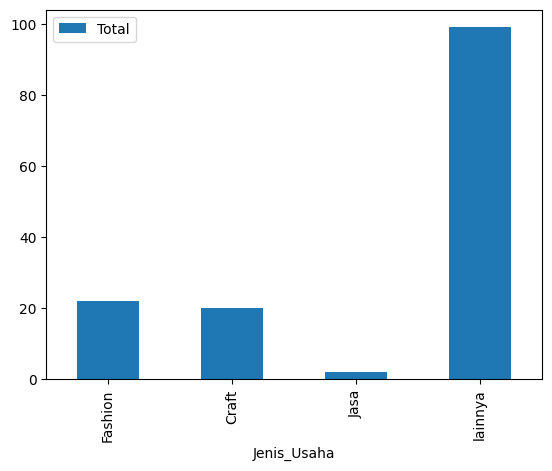

In [23]:
df_groups1 = df3.groupby(['Jenis_Usaha'])[['Total',]].mean()
df_groups1.plot(kind='bar')

C:\Users\HP\AppData\Local\Temp\ipykernel_3676\2373809271.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_groups2 = df2.groupby(['Kelurahan'])[['Jumlah_Kepala_Keluarga', 'Jumlah_Anggota_Keluarga']].mean()


<Axes: xlabel='Kelurahan'>

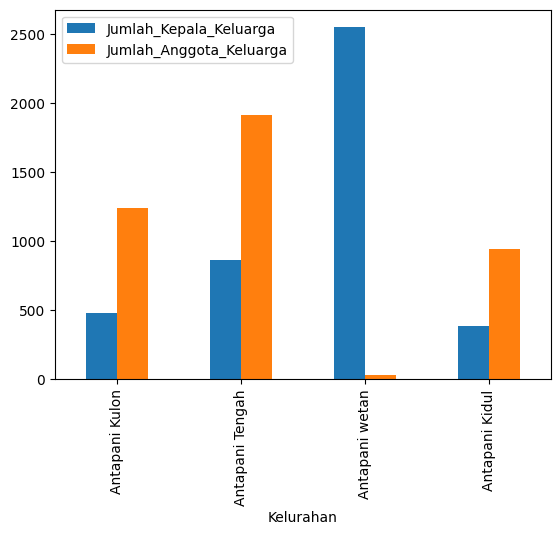

In [24]:
df_groups2 = df2.groupby(['Kelurahan'])[['Jumlah_Kepala_Keluarga', 'Jumlah_Anggota_Keluarga']].mean()
df_groups2.plot(kind='bar')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

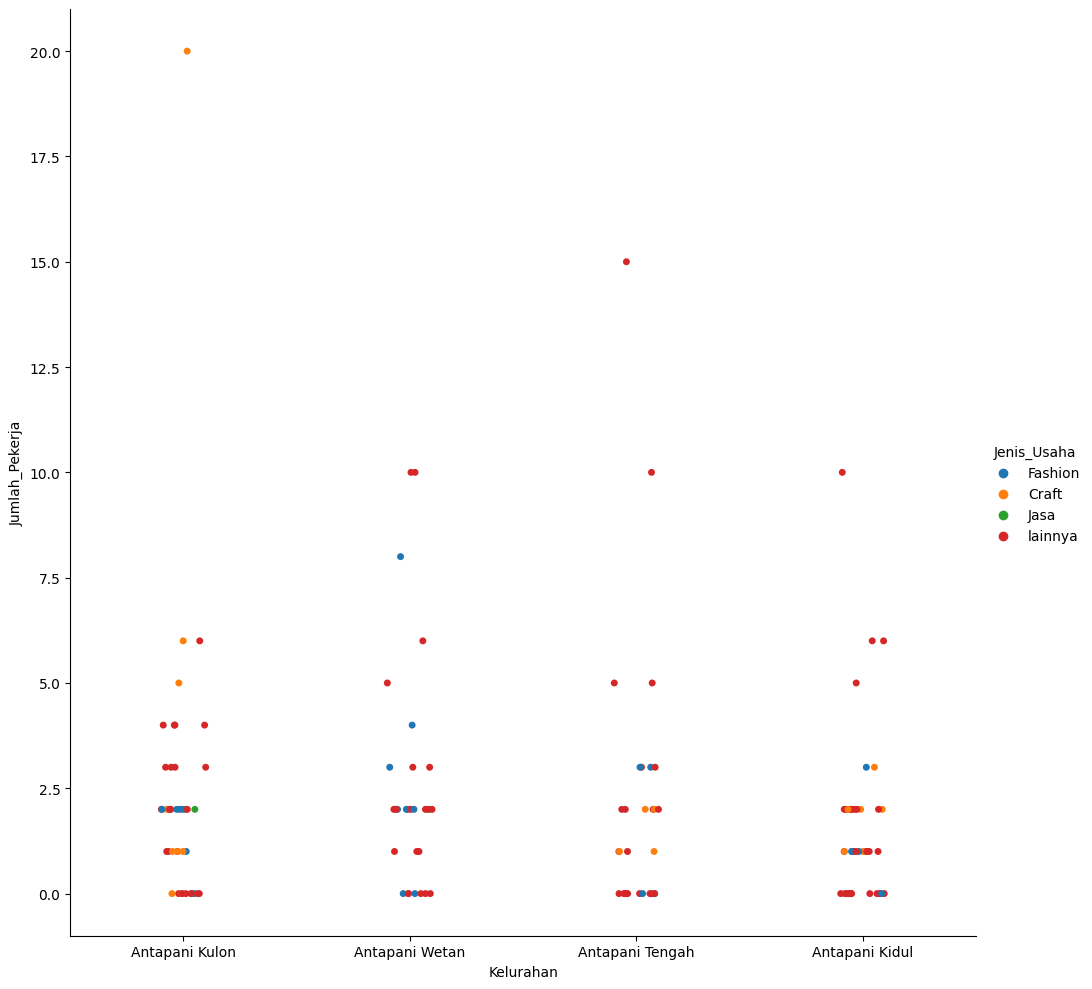

In [25]:
sns.catplot(x="Kelurahan", y="Jumlah_Pekerja", hue="Jenis_Usaha", data=df1, height=10)